##Tirmzi Analysis
n=1000 m+=1000 nm-=120 istep= 4 min=150 max=700

In [1]:
import sys
sys.path
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal

In [2]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is AA1B-997A

 Directory of C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data\Output-Fortran

09/07/2021  09:29 AM    <DIR>          .
09/07/2021  09:29 AM    <DIR>          ..
09/07/2021  09:27 AM    <DIR>          .ipynb_checkpoints
08/31/2021  10:49 AM    <DIR>          0307-testinputfile4-0004
08/31/2021  10:49 AM    <DIR>          0308-testinputfile4-0004
08/31/2021  10:49 AM    <DIR>          0309-VariedNuni_8_2_2021-0000
08/31/2021  10:49 AM    <DIR>          0310-VariedNuni_8_2_2021-0000
08/31/2021  10:49 AM    <DIR>          0311-VariedNuni_8_2_2021-0001
08/31/2021  10:49 AM    <DIR>          0312-VariedNuni_8_2_2021-0001
08/31/2021  10:49 AM    <DIR>          0313-VariedNuni_8_2_2021-0002
08/31/2021  10:49 AM    <DIR>          0314-VariedNuni_8_2_2021-0002
08/31/2021  10:49 AM    <DIR>          0315-er_equal_1-0002
08/31/2021  10:49 AM    <DIR>          0316-er_equal_1-0002
08/31/2021  1

In [3]:
import capsol.newanalyzecapsol as ac

In [4]:
ac.get_gridparameters

<function capsol.newanalyzecapsol.get_gridparameters(f_name)>

In [5]:
import glob

In [6]:
folders =glob.glob('*NewTirmzi_variedthickness_75075090*/')
folders

['0373-NewTirmzi_variedthickness_75075090-0000\\',
 '0379-NewTirmzi_variedthickness_75075090-0001\\',
 '0387-NewTirmzi_variedthickness_75075090-0003\\',
 '0393-NewTirmzi_variedthickness_75075090-0002\\']

In [7]:
all_data= dict() 
for folder in folders:
    params = ac.get_gridparameters(folder + 'capsol.in')
    data = ac.np.loadtxt(folder + 'Z-U.dat')
    process_data = ac.process_data(params, data, smoothing=False, std=5*10**-9)
    all_data[folder]= (process_data)
all_params= dict()
for folder in folders:
    params=ac.get_gridparameters(folder + 'capsol.in')
    all_params[folder]= (params)

In [8]:
all_data

{'0373-NewTirmzi_variedthickness_75075090-0000\\': {'z': array([ 99.9999, 102.    , 104.0001, 105.9999, 108.    , 110.0001,
         111.9999, 114.    , 116.0001, 117.9999, 120.    , 122.0001,
         123.9999, 126.    , 128.0001, 129.9999, 132.    , 134.0001,
         135.9999, 138.    , 140.0001, 141.9999, 144.    , 146.0001,
         147.9999, 150.    , 152.0001, 153.9999, 156.    , 158.0001,
         159.9999, 162.    , 164.0001, 165.9999, 168.    , 170.0001,
         171.9999, 174.    , 176.0001, 177.9999, 180.    , 182.0001,
         183.9999, 186.    , 188.0001, 189.9999, 192.    , 194.0001,
         195.9999, 198.    , 200.0001, 201.9999, 204.    , 206.0001,
         207.9999, 210.    , 212.0001, 213.9999, 216.    , 218.0001,
         219.9999, 222.    , 224.0001, 225.9999, 228.    , 230.0001,
         231.9999, 234.    , 236.0001, 237.9999, 240.    , 242.0001,
         243.9999, 246.    , 248.0001]),
  'c': array([1.75716284e-15, 1.75691809e-15, 1.75667451e-15, 1.75643201e-15

In [9]:
all_data.keys()

dict_keys(['0373-NewTirmzi_variedthickness_75075090-0000\\', '0379-NewTirmzi_variedthickness_75075090-0001\\', '0387-NewTirmzi_variedthickness_75075090-0003\\', '0393-NewTirmzi_variedthickness_75075090-0002\\'])

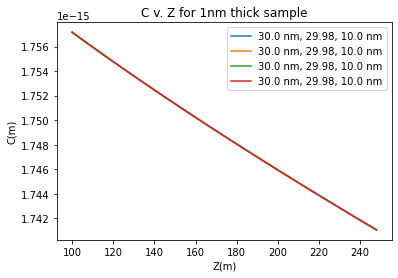

In [10]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 10}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm')
    
    
plt.title('C v. Z for 1nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for 1nm thick sample 06-28-2021.png")

cut off last experiment because capacitance was off the scale

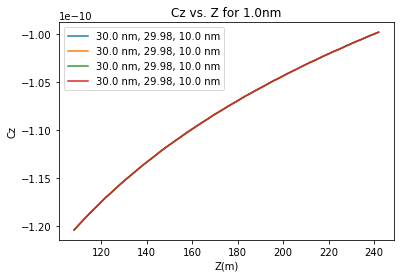

In [11]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 10}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 1.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

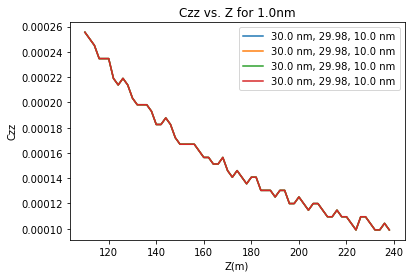

In [12]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 10}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 1.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [13]:
params

{'n': 750,
 'm+': 750,
 'm-': 88,
 'h0': 0.5,
 'rho_max': 1000000.0,
 'z_max': 1000000.0,
 'min': 100.0,
 'max': 249.99,
 'istep': 4.0,
 'Rtip': 30.0,
 'half-angle': 20.0,
 'HCone': 11999.99,
 'RCantilever': 13750.0,
 'thickness_Cantilever': 1000.0,
 'eps_r': 29.98,
 'Thickness_sample': 10.0,
 'Solving Method': 'LAPACK',
 'Test': 0,
 'Verbosity': 0,
 'Nuni': 1,
 'Equally spaced': True}

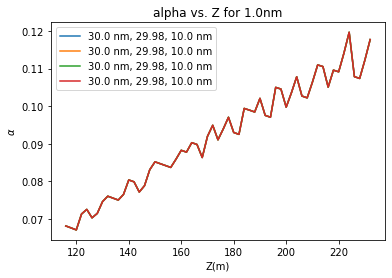

In [14]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 10}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")

In [15]:
data

{'z': array([ 99.9999, 102.    , 104.0001, 105.9999, 108.    , 110.0001,
        111.9999, 114.    , 116.0001, 117.9999, 120.    , 122.0001,
        123.9999, 126.    , 128.0001, 129.9999, 132.    , 134.0001,
        135.9999, 138.    , 140.0001, 141.9999, 144.    , 146.0001,
        147.9999, 150.    , 152.0001, 153.9999, 156.    , 158.0001,
        159.9999, 162.    , 164.0001, 165.9999, 168.    , 170.0001,
        171.9999, 174.    , 176.0001, 177.9999, 180.    , 182.0001,
        183.9999, 186.    , 188.0001, 189.9999, 192.    , 194.0001,
        195.9999, 198.    , 200.0001, 201.9999, 204.    , 206.0001,
        207.9999, 210.    , 212.0001, 213.9999, 216.    , 218.0001,
        219.9999, 222.    , 224.0001, 225.9999, 228.    , 230.0001,
        231.9999, 234.    , 236.0001, 237.9999, 240.    , 242.0001,
        243.9999, 246.    , 248.0001]),
 'c': array([1.75716284e-15, 1.75691809e-15, 1.75667451e-15, 1.75643201e-15,
        1.75619060e-15, 1.75595027e-15, 1.75571094e-15, 1.7554

In [16]:
from scipy.optimize import curve_fit


In [17]:
def Cz_model(z, a, n, b,):
    return(a*z**n + b)

In [18]:
all_data.keys()

dict_keys(['0373-NewTirmzi_variedthickness_75075090-0000\\', '0379-NewTirmzi_variedthickness_75075090-0001\\', '0387-NewTirmzi_variedthickness_75075090-0003\\', '0393-NewTirmzi_variedthickness_75075090-0002\\'])

In [19]:
data= all_data['capsol-calc\\0001-capsol\\']
z= data['z'][1:-1]
cz= data['cz'][1:-1]

KeyError: 'capsol-calc\\0001-capsol\\'

In [ ]:
popt, pcov= curve_fit(Cz_model, z, cz, p0=[cz[0]*z[0], -1, 0])
a=popt[0]
n=popt[1]
b=popt[2]
std_devs= np.sqrt(pcov.diagonal())
sigma_a = std_devs[0]
sigma_n = std_devs[1]
model_output= Cz_model(z, a, n, b)
rmse= np.sqrt(np.mean((cz - model_output)**2))


In [ ]:
f"a= {a} ± {sigma_a}"

In [ ]:
f"n= {n}± {sigma_n}"

In [ ]:
model_output

In [ ]:
"Root Mean Square Error"

In [ ]:
rmse/np.mean(-cz)